In [142]:
# Needed libraries 
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd
import lxml
import html5lib
import urllib.robotparser
import matplotlib.pyplot as plt
%matplotlib inline

# Using headers recommended by Subirats & Calvo (2019)
headers = {
"Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,\
*/*;q=0.8",
"Accept-Encoding": "gzip, deflate, sdch, br",
"Accept-Language": "en-US,en;q=0.8",
"Cache-Control": "no-cache",
"dnt": "1",
"Pragma": "no-cache",
"Upgrade-Insecure-Requests": "1",
"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_3) AppleWebKit/5\
37.36 (KHTML, like Gecko) Chrome/56.0.2924.87 Safari/537.36"
}

# Check if we can crawl the desired page
url = 'https://electocracia.com/'
rp = urllib.robotparser.RobotFileParser()
rp.set_url(url+'robots.txt')
rp.read()
can = rp.can_fetch("*", url)
if can:      
    # Download the page
    page = requests.get(url, 'lxml', headers=headers)
    # Parse the page with BeautifulSoup
    soup = BeautifulSoup(page.content)
    # We can see that our desired data is already in a table with id 'tablepress-2'
    table = str(soup.findAll('table', attrs={"id" : "tablepress-2"}))
    # Fixes a problem with decimal points
    table1 = table.replace(",", ".")
    # Gets the table to a list of dataframes
    dfs = pd.read_html(table1, header = 0)
    # Gets an operable dataframe 
    df = dfs[0]
    # Fixes the names of some columns
    df.rename(columns = {df.columns[5] : 'PSOE', df.columns[6] : 'PP', df.columns[7] : 'Cs', df.columns[8] : 'UP', df.columns[9] : 'Vox'}, inplace = True)
    # Fixes a problem with the dates
    df["PUBLICACIÓN"] = pd.to_datetime(df["PUBLICACIÓN"], dayfirst = True)
    df["FIN CAMPO"] = pd.to_datetime(df["FIN CAMPO"], dayfirst = True)
    # Gets the final CSV file
    df.to_csv('polls.csv', index = False, encoding = 'utf-8')
else: print('The requested action is contrary to the robots.txt policy')

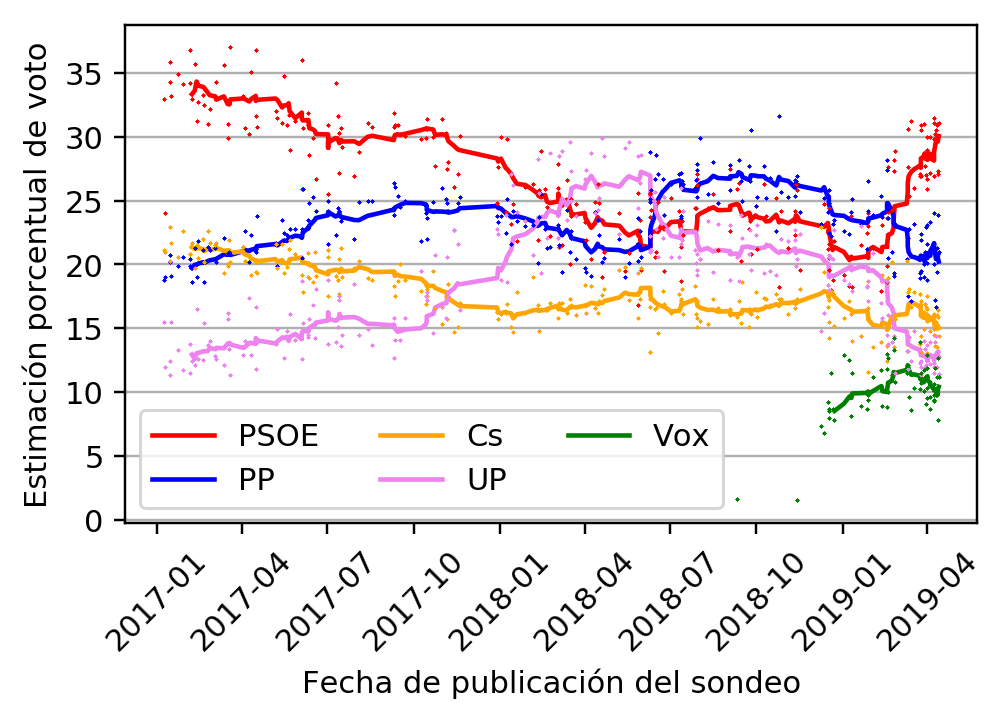

In [143]:
# In order to plot some of the data
import matplotlib.pyplot as plt
%matplotlib inline

# Sorting the values
df = df.sort_values(by=['PUBLICACIÓN', 'FIN CAMPO'])

colors = ['red', 'blue', 'orange', 'violet', 'green']
parties = ['PSOE', 'PP', 'Cs', 'UP', 'Vox']

# Calculating rolling means
partymm = parties
for a in range(len(parties)):
    partymm[a] = df[parties[a]].rolling(10).mean()  

# Plots a figure
plt.figure(figsize=(5, 3), dpi=220, facecolor='w', edgecolor='k')

line = parties
for b in range(len(parties)):
    # Plotting the rolling means
    line[b] = plt.plot_date(x=df['PUBLICACIÓN'], y=partymm[b], color=colors[b], marker = 'None', linestyle = 'solid')
for c in range(5,10):    
    # Plotting each value
    plt.plot_date(x=df['PUBLICACIÓN'], y=df[df.columns[c]], color=colors[c-5], marker = 'x', ms = 0.7)
    
# Establishing some aspects of the figure
plt.xticks(rotation=45)
plt.grid(which = 'major', axis = 'y')
plt.legend(df.columns[5:10], loc = 3, ncol = 3)
plt.xlabel('Fecha de publicación del sondeo')
plt.ylabel('Estimación porcentual de voto')

# Showing the figure
plt.show()
